In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tdc
import MDAnalysis as md

In [8]:
monomer = tdc.freq("formamide_monomer_tdc_calc.log")

In [9]:
modes = [7,8,9]
monomer.select_modes(modes)

In [10]:
monomer.dipoleDerivative

array([[-1.17977637e+00, -3.40615412e-10,  4.72270524e-01],
       [-1.14001155e+00, -1.02184008e-10,  2.67446848e+00],
       [-1.33000861e+00, -1.71558385e-10, -9.27102306e-01]])

In [11]:
print("Selected monomer frequencies:", monomer.frequencies)
print("Selected monomer IR intesities:",monomer.irIntensities)

Selected monomer frequencies: [1640.5185 1847.0619 2995.6147]
Selected monomer IR intesities: [ 68.2398 357.1644 111.0677]


In [12]:
coord = md.Universe("../formamide_dimer.pdb")
tdcDimer = tdc.tdc(monomer,coord.atoms.positions)

[-7.70120166e-01 -1.01085443e+00 -3.40615412e-10] [3.3331910e-04 3.3333895e-04 5.0000000e+00] -0.0005936546131838521
[-2.88175695e+00 -3.84558036e-01 -1.02184008e-10] [3.3331910e-04 3.3333895e-04 5.0000000e+00] -0.001088733309774422
[ 5.38341438e-01 -1.52925802e+00 -1.71558385e-10] [3.3331910e-04 3.3333895e-04 5.0000000e+00] -0.00033032263251168563


In [13]:
print("TDC Dimer frequencies:", tdcDimer.frequencies)
print("TDC Dimer IR intensities:", tdcDimer.irIntensities)

TDC Dimer frequencies: [1640.06885701 1640.95543261 1845.00691615 1849.12807711 2995.18405828
 2995.97427658]
TDC Dimer IR intensities: [ 19.66662466 114.72627448 104.68135412 611.23413569  32.74512886
 189.89318705]


In [14]:
dftDimer = tdc.freq("../formamide_wb97xd.dimer_freq.log")
dimerModes = [20,21,22,23,24,25]
dftDimer.select_modes(dimerModes)

In [15]:
print("DFT Dimer frequencies:", dftDimer.frequencies)
print("DFT Dimer IR intensities:",dftDimer.irIntensities)

DFT Dimer frequencies: [1654.4948 1655.7096 1840.6149 1846.445  3014.2083 3018.7798]
DFT Dimer IR intensities: [ 45.6327  93.4735 145.8642 774.5472  87.575  102.6275]


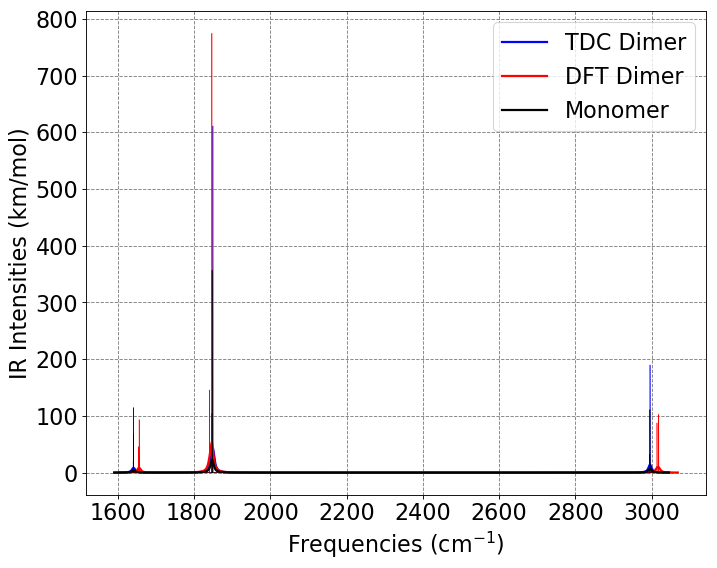

In [16]:
fig = plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_xlabel("Frequencies (cm$^{-1}$)",size=20)
ax.set_ylabel("IR Intensities (km/mol)",size=20)
plt.tick_params(axis='both',labelsize=20)
tdcSticks = tdcDimer.sticks()
tdcLorentz = tdcDimer.lorentzian_convolution(fwhm=10)
dftSticks = dftDimer.sticks()
dftLorentz = dftDimer.lorentzian_convolution(fwhm=10)
monomerSticks = monomer.sticks()
monomerLorentz = monomer.lorentzian_convolution(fwhm=10)
ax.plot(tdcSticks[:,0],tdcSticks[:,1],c="b",lw=0.5)
ax.plot(tdcLorentz[:,0],tdcLorentz[:,1],c="b",lw=2,label="TDC Dimer")
ax.plot(dftSticks[:,0],dftSticks[:,1],c="r",lw=0.5)
ax.plot(dftLorentz[:,0],dftLorentz[:,1],c="r",lw=2,label="DFT Dimer")
ax.plot(monomerSticks[:,0],monomerSticks[:,1],c="k",lw=0.5)
ax.plot(monomerLorentz[:,0],monomerLorentz[:,1],c="k",lw=2,label="Monomer")
plt.legend(fontsize=20)
#plt.xlim(1800,1900)
#plt.ylim(0,200)